In [1]:
#https://www.kaggle.com/code/ysthehurricane/crop-recommendation-system-using-lightgbm
#https://www.kaggle.com/code/atharvaingle/what-crop-to-grow
#https://www.kaggle.com/code/patelris/crop-prediction-analysis-w-classification

In [2]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Crop_recommendation.csv")
json_data = df.to_json(orient='records', indent=2)

# Write JSON to a file
with open('data.json', 'w') as jsonfile:
    jsonfile.write(json_data)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
print("Number of various crops: ", len(df['label'].unique()))
print("List of crops: ", df['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [8]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [10]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:11].sort_values().index,
    'x' : crop_summary_N['N'][0:11].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-11:].index,
    'x' : crop_summary_N['N'][-11:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color='#0592D0',
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color='#Cd7f32',
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white')

fig.show()

In [11]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:11].sort_values().index,
    'x' : crop_summary_P['P'][0:11].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-11:].index,
    'x' : crop_summary_P['P'][-11:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color='#Bdb76b',
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color='#E97451',
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white')
fig.show()

In [12]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:11].sort_values().index,
    'x' : crop_summary_K['K'][0:11].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-11:].index,
    'x' : crop_summary_K['K'][-11:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color='#954535',
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color='#C2b280',
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white')
fig.show()

In [13]:
features = df[['N', 'P','K','temperature', 'humidity']]
target = df['label']
labels = df['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  80.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.36      1.00      0.53        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.33      0.07      0.12        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.00      0.00      0.00        23
       maize       1.00      1.00      1.00        21
       mango       0.47      1.00      0.64        26
   mothbeans       1.00      0.16      0.27        19
    mungbean       0.96      1.00      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.89545455, 0.87272727, 0.86818182, 0.83181818, 0.87272727])

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [20]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


Naive Bayes's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.68      0.81      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      0.79      0.83        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.80      0.87      0.83        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.84      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.94772727, 0.96136364, 0.95      , 0.95909091, 0.95227273])

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [23]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.2409090909090909
              precision    recall  f1-score   support

       apple       1.00      0.62      0.76        13
      banana       1.00      0.29      0.45        17
   blackgram       0.71      0.31      0.43        16
    chickpea       1.00      0.19      0.32        21
     coconut       1.00      0.19      0.32        21
      coffee       1.00      0.14      0.24        22
      cotton       1.00      0.45      0.62        20
      grapes       1.00      0.11      0.20        18
        jute       1.00      0.14      0.25        28
 kidneybeans       0.04      1.00      0.08        14
      lentil       0.75      0.13      0.22        23
       maize       1.00      0.05      0.09        21
       mango       1.00      0.08      0.14        26
   mothbeans       1.00      0.21      0.35        19
    mungbean       1.00      0.17      0.29        24
   muskmelon       1.00      0.39      0.56        23
      orange       1.00      0.10      0.1

In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.41136364, 0.41136364, 0.36818182, 0.41590909, 0.42727273])

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.56      0.56      0.56        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.76      0.46      0.58        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.78      0.78      0.78        23
       maize       0.95      1.00      0.98        21
       mango       1.00      0.96      0.98        26
   mothbeans       0.58      0.74      0.65        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       0.86      0.78      0.82        23
      orange       1.00   

In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.87954545, 0.87045455, 0.89772727, 0.88863636, 0.86590909])

In [27]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0).fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.70      0.88      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.86      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.81      0.74      0.77        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.96363636, 0.95      , 0.95909091, 0.94772727, 0.96590909])

In [42]:
import pickle
import joblib
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()
joblib.dump(RF,'random_forest_model.joblib')


['random_forest_model.joblib']

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

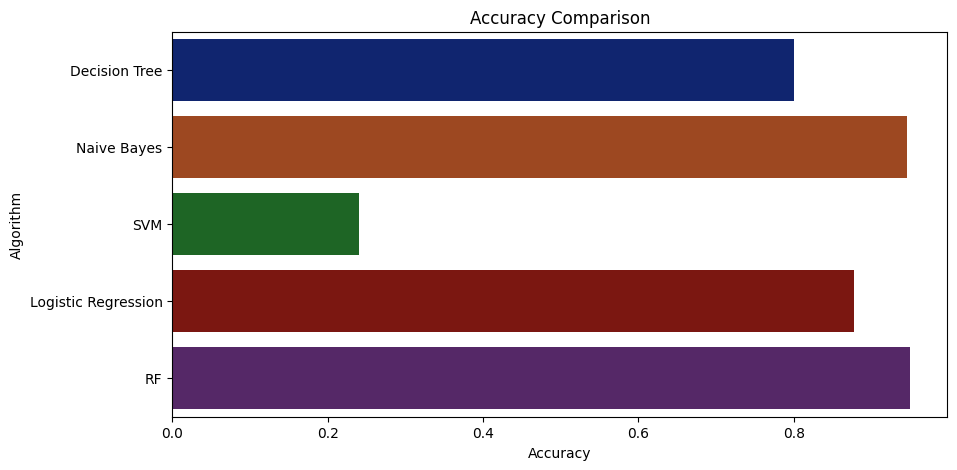

In [31]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
data = np.array([[100,18, 20, 23.603016, 60.3]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']
